https://tianchi.aliyun.com/competition/entrance/531825/introduction

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix #混淆矩阵
from sklearn.metrics import roc_curve, auc
from itertools import cycle
from sklearn.preprocessing import label_binarize #标签二值化LabelBinarizer，可以把yes和no转化为0和1，或是把incident和normal转化为0和1
# from sklearn.multiclass import OneVsRestClassifie

In [5]:
plt.rcParams['font.sans-serif'] = ['SimHei'] 
plt.rcParams['axes.unicode_minus'] = False

In [6]:
import warnings
warnings.filterwarnings("ignore")

In [7]:
df = pd.read_csv(r'D:\课程材料\深研院\机器学习\相亲\speed_dating_train.csv')
df.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,352,12.0,0,23,2,14,18,12,12.0,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,170,13.0,1,26,2,7,16,15,6.0,10,...,6.0,8.0,9.0,5.0,7.0,NaN,NaN,NaN,NaN,NaN
2,221,8.0,1,16,2,9,20,8,7.0,2,...,6.0,8.0,9.0,7.0,9.0,NaN,NaN,NaN,NaN,NaN
3,211,18.0,0,35,2,9,20,7,7.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,238,5.0,0,9,1,10,9,7,7.0,3,...,9.0,9.0,9.0,9.0,8.0,8.0,8.0,8.0,8.0,7.0


# 预处理

In [8]:
df.duplicated().sum() #是否重复

0

## 缺失值

In [9]:
df_train = df[['gender','int_corr',
 'age','race','imprace','imprelig','field_cd','goal','date','go_out','career_c',
 'sports', 'tvsports', 'exercise', 'dining',
 'museums', 'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv',
 'theater', 'movies', 'concerts', 'music', 'shopping', 'yoga',
 'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1',
 'attr3_1','sinc3_1','intel3_1','fun3_1','amb3_1',
 'attr', 'sinc', 'intel', 'fun', 'like', 'prob', 'met',
 'age_o','race_o',
 'attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o','shar_o',
 'like_o','prob_o', 'met_o','dec','dec_o','match']] #选取部分列 
#性别、参与者和合作伙伴在时间中的兴趣评级之间的相关性basic
#年龄、种族、相同种族对钟意指数多重要、相同宗教信仰对钟意指数多重要、职业编码、参加活动的目的、平时约会频率、多久出去一次、打算从事的职
#兴趣爱好
#兴趣爱好
#兴趣爱好
#寻找什么
#自评
#basic
#对方年龄、对方种族
#对方打分
#basic

In [10]:
list_1 = ['gender','int_corr','age','race','imprace','imprelig','field_cd','goal','date','go_out','career_c','age_o','race_o']
for column in list_1: #第一部分缺失值
    mean_val = df_train[column].mean()
    df_train[column].fillna(mean_val, inplace = True)

for i in ['gender','age','race','imprace','imprelig','field_cd','goal','date','go_out','career_c','age_o','race_o']:
    df_train[i] = df_train[i].astype(int)

In [11]:
list_2 = [ 'sports', 'tvsports', 'exercise', 'dining','museums', 'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv','theater', 'yoga', 'movies', 'match', 'music', 'shopping', 'concerts']
for column in list_2: #兴趣爱好
    df_train[column][(df_train[column] > 10)] = 10
    df_train[column][(df_train[column] < 0)] = 0
    mean_val = df_train[column].mean()
    df_train[column].fillna(mean_val, inplace = True)
    df_train[column] = df_train[column].astype(int)

In [12]:
list_3 = ['attr3_1','sinc3_1','intel3_1','fun3_1','amb3_1','attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o','shar_o']
for column in list_3:
    df_train[column][(df_train[column] > 10)] = 10
    df_train[column][(df_train[column] < 0)] = 0
    mean_val = df_train[column].mean()
    df_train[column].fillna(mean_val, inplace = True)
    df_train[column] = df_train[column].astype(int)

In [13]:
list_4 = ['attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1']
for column in list_4:
    df_train[column][(df_train[column] > 100)] = 100
    df_train[column][(df_train[column] < 0)] = 0
    mean_val = df_train[column].mean()
    df_train[column].fillna(mean_val, inplace = True)
    df_train[column] = df_train[column].astype(int)

In [14]:
list_5 = ['attr', 'sinc', 'intel', 'fun', 'like', 'prob', 'met','like_o','prob_o', 'met_o']
for column in list_5:
    mean_val = df_train[column].mean()
    df_train[column].fillna(mean_val, inplace = True)
    df_train[column] = df_train[column].astype(int)

In [15]:
ind = df_train.isnull().T.any()
df_train[ind]

,gender,int_corr,age,race,imprace,imprelig,field_cd,goal,date,go_out,...,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,dec,dec_o,match


# 数据集划分

In [16]:
x_train, x_test, y_train, y_test = train_test_split(df_train.iloc[:,:-1],df_train['match'],random_state = 42)

In [17]:
len(x_train)

6207

In [18]:
len(x_test)

2070

In [19]:
len(y_train)

6207

In [20]:
len(y_test)

2070

## 划分情况

In [21]:
df_train

,gender,int_corr,age,race,imprace,imprelig,field_cd,goal,date,go_out,...,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,dec,dec_o,match
0,0,0.160000,29,6,6,6,9,2,4,3,...,7,1,5,1,3,2,2,1,0,0
1,1,0.250000,28,4,2,1,10,1,5,3,...,10,5,9,6,6,5,2,1,0,0
2,1,0.330000,27,4,6,1,8,2,6,3,...,10,6,9,7,7,7,2,1,0,0
3,0,0.050000,28,2,9,1,13,2,4,1,...,6,6,7,3,6,3,2,0,1,0
4,0,0.180000,27,2,3,5,15,1,2,1,...,8,8,9,7,8,5,2,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8272,1,0.350000,23,2,8,1,9,2,3,2,...,6,5,6,7,6,4,2,0,0,0
8273,0,0.370000,30,3,2,4,3,2,6,2,...,9,10,8,8,7,5,2,1,0,0
8274,0,0.195608,26,2,3,3,3,2,5,2,...,8,7,6,5,7,5,2,0,1,0
8275,0,0.195608,26,2,3,3,3,2,5,2,...,6,4,7,6,5,2,2,0,0,0


In [22]:
y_train.sum()/len(y_train) #训练集划分后的训练集中匹配成功的占比

0.16078620911873692

In [23]:
y_test.sum()/len(y_test) #训练集划分后的测试集中匹配成功的占比

0.17246376811594202

# 属性选择

In [24]:
#性别、参与者和合作伙伴在时间中的兴趣评级之间的相关性
#年龄、种族、相同种族对钟意指数多重要、相同宗教信仰对钟意指数多重要、职业编码、参加活动的目的、平时约会频率、多久出去一次、打算从事的职
#兴趣爱好
#兴趣爱好
#兴趣爱好
#寻找什么
#自评
#basic
#对方年龄、对方种族、
#对方打分
#basic

In [25]:
#主要是看兴趣爱好、寻找什么、自评、对方评分是否要加入模型

## 决策树

In [26]:
from sklearn.tree import DecisionTreeClassifier

In [27]:
score_DecisionTree = pd.DataFrame(columns=('name','acc_score','pre_score','F-measure'))

In [28]:
score_DecisionTree

,name,acc_score,pre_score,F-measure


### basic

In [29]:
#basic
re_tree = DecisionTreeClassifier()
re_tree.fit(x_train[['gender','int_corr','age','race','imprace','imprelig','field_cd','goal','date','go_out','career_c','attr', 'sinc', 'intel', 'fun', 'like', 'prob', 'met','age_o','race_o','like_o','prob_o', 'met_o']],y_train)
y_pred_tree = re_tree.predict(x_test[['gender','int_corr','age','race','imprace','imprelig','field_cd','goal','date','go_out','career_c','attr', 'sinc', 'intel', 'fun', 'like', 'prob', 'met','age_o','race_o','like_o','prob_o', 'met_o']])
acc_score = accuracy_score(y_pred_tree, y_test)
pre_score = metrics.precision_score(y_pred_tree, y_test, average = 'weighted') #精确率
F1_score = metrics.f1_score(y_pred_tree, y_test, average = 'weighted') 
score_DecisionTree = score_DecisionTree.append([{'name':'basic','acc_score':acc_score, 'pre_score':pre_score, 'F-measure':F1_score}])

### basic + 1

In [30]:
#basic + 兴趣爱好
re_tree = DecisionTreeClassifier()
re_tree.fit(x_train[['gender','int_corr','age','race','imprace','imprelig','field_cd','goal','date','go_out','career_c','attr', 'sinc', 'intel', 'fun', 'like', 'prob', 'met','age_o','race_o','like_o','prob_o', 'met_o','sports', 'tvsports', 'exercise', 'dining','museums', 'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv','theater', 'movies', 'concerts', 'music', 'shopping', 'yoga']],y_train)
y_pred_tree = re_tree.predict(x_test[['gender','int_corr','age','race','imprace','imprelig','field_cd','goal','date','go_out','career_c','attr', 'sinc', 'intel', 'fun', 'like', 'prob', 'met','age_o','race_o','like_o','prob_o', 'met_o','sports', 'tvsports', 'exercise', 'dining','museums', 'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv','theater', 'movies', 'concerts', 'music', 'shopping', 'yoga']])
acc_score = accuracy_score(y_pred_tree, y_test)
pre_score = metrics.precision_score(y_pred_tree, y_test, average = 'weighted') #精确率
F1_score = metrics.f1_score(y_pred_tree, y_test, average = 'weighted') 
score_DecisionTree = score_DecisionTree.append([{'name':'basic+兴趣爱好','acc_score':acc_score, 'pre_score':pre_score, 'F-measure':F1_score}])

In [31]:
#basic + 寻找什么
re_tree = DecisionTreeClassifier()
re_tree.fit(x_train[['gender','int_corr','age','race','imprace','imprelig','field_cd','goal','date','go_out','career_c','attr', 'sinc', 'intel', 'fun', 'like', 'prob', 'met','age_o','race_o','like_o','prob_o', 'met_o','attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1']],y_train)
y_pred_tree = re_tree.predict(x_test[['gender','int_corr','age','race','imprace','imprelig','field_cd','goal','date','go_out','career_c','attr', 'sinc', 'intel', 'fun', 'like', 'prob', 'met','age_o','race_o','like_o','prob_o', 'met_o','attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1']])
acc_score = accuracy_score(y_pred_tree, y_test)
pre_score = metrics.precision_score(y_pred_tree, y_test, average = 'weighted') #精确率
F1_score = metrics.f1_score(y_pred_tree, y_test, average = 'weighted') 
score_DecisionTree = score_DecisionTree.append([{'name':'basic+寻找什么','acc_score':acc_score, 'pre_score':pre_score, 'F-measure':F1_score}])

In [32]:
#basic + 自评
re_tree = DecisionTreeClassifier()
re_tree.fit(x_train[['gender','int_corr','age','race','imprace','imprelig','field_cd','goal','date','go_out','career_c','attr', 'sinc', 'intel', 'fun', 'like', 'prob', 'met','age_o','race_o','like_o','prob_o', 'met_o','attr3_1','sinc3_1','intel3_1','fun3_1','amb3_1']],y_train)
y_pred_tree = re_tree.predict(x_test[['gender','int_corr','age','race','imprace','imprelig','field_cd','goal','date','go_out','career_c','attr', 'sinc', 'intel', 'fun', 'like', 'prob', 'met','age_o','race_o','like_o','prob_o', 'met_o','attr3_1','sinc3_1','intel3_1','fun3_1','amb3_1']])
acc_score = accuracy_score(y_pred_tree, y_test)
pre_score = metrics.precision_score(y_pred_tree, y_test, average = 'weighted') #精确率
F1_score = metrics.f1_score(y_pred_tree, y_test, average = 'weighted') 
score_DecisionTree = score_DecisionTree.append([{'name':'basic+自评','acc_score':acc_score, 'pre_score':pre_score, 'F-measure':F1_score}])

In [33]:
#basic + 对方评分
re_tree = DecisionTreeClassifier()
re_tree.fit(x_train[['gender','int_corr','age','race','imprace','imprelig','field_cd','goal','date','go_out','career_c','attr', 'sinc', 'intel', 'fun', 'like', 'prob', 'met','age_o','race_o','like_o','prob_o', 'met_o','attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o','shar_o']],y_train)
y_pred_tree = re_tree.predict(x_test[['gender','int_corr','age','race','imprace','imprelig','field_cd','goal','date','go_out','career_c','attr', 'sinc', 'intel', 'fun', 'like', 'prob', 'met','age_o','race_o','like_o','prob_o', 'met_o','attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o','shar_o']])
acc_score = accuracy_score(y_pred_tree, y_test)
pre_score = metrics.precision_score(y_pred_tree, y_test, average = 'weighted') #精确率
F1_score = metrics.f1_score(y_pred_tree, y_test, average = 'weighted') 
score_DecisionTree = score_DecisionTree.append([{'name':'basic+对方评分','acc_score':acc_score, 'pre_score':pre_score, 'F-measure':F1_score}])

### basic + 2

In [34]:
#basic + 自评 + 兴趣爱好
re_tree = DecisionTreeClassifier()
re_tree.fit(x_train[['gender','int_corr','age','race','imprace','imprelig','field_cd','goal','date','go_out','career_c','attr', 'sinc', 'intel', 'fun', 'like', 'prob', 'met','age_o','race_o','like_o','prob_o', 'met_o','attr3_1','sinc3_1','intel3_1','fun3_1','amb3_1','sports', 'tvsports', 'exercise', 'dining','museums', 'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv','theater', 'movies', 'concerts', 'music', 'shopping', 'yoga']],y_train)
y_pred_tree = re_tree.predict(x_test[['gender','int_corr','age','race','imprace','imprelig','field_cd','goal','date','go_out','career_c','attr', 'sinc', 'intel', 'fun', 'like', 'prob', 'met','age_o','race_o','like_o','prob_o', 'met_o','attr3_1','sinc3_1','intel3_1','fun3_1','amb3_1','sports', 'tvsports', 'exercise', 'dining','museums', 'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv','theater', 'movies', 'concerts', 'music', 'shopping', 'yoga']])
acc_score = accuracy_score(y_pred_tree, y_test)
pre_score = metrics.precision_score(y_pred_tree, y_test, average = 'weighted') #精确率
F1_score = metrics.f1_score(y_pred_tree, y_test, average = 'weighted') 
score_DecisionTree = score_DecisionTree.append([{'name':'basic+自评+兴趣爱好','acc_score':acc_score, 'pre_score':pre_score, 'F-measure':F1_score}])

In [35]:
#basic + 自评 + 寻找什么
re_tree = DecisionTreeClassifier()
re_tree.fit(x_train[['gender','int_corr','age','race','imprace','imprelig','field_cd','goal','date','go_out','career_c','attr', 'sinc', 'intel', 'fun', 'like', 'prob', 'met','age_o','race_o','like_o','prob_o', 'met_o','attr3_1','sinc3_1','intel3_1','fun3_1','amb3_1','attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1']],y_train)
y_pred_tree = re_tree.predict(x_test[['gender','int_corr','age','race','imprace','imprelig','field_cd','goal','date','go_out','career_c','attr', 'sinc', 'intel', 'fun', 'like', 'prob', 'met','age_o','race_o','like_o','prob_o', 'met_o','attr3_1','sinc3_1','intel3_1','fun3_1','amb3_1','attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1']])
acc_score = accuracy_score(y_pred_tree, y_test)
pre_score = metrics.precision_score(y_pred_tree, y_test, average = 'weighted') #精确率
F1_score = metrics.f1_score(y_pred_tree, y_test, average = 'weighted') 
score_DecisionTree = score_DecisionTree.append([{'name':'basic+自评+寻找什么','acc_score':acc_score, 'pre_score':pre_score,'F-measure':F1_score}])

In [36]:
#basic + 自评 + 对方评分
re_tree = DecisionTreeClassifier()
re_tree.fit(x_train[['gender','int_corr','age','race','imprace','imprelig','field_cd','goal','date','go_out','career_c','attr', 'sinc', 'intel', 'fun', 'like', 'prob', 'met','age_o','race_o','like_o','prob_o', 'met_o','attr3_1','sinc3_1','intel3_1','fun3_1','amb3_1','attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o','shar_o']],y_train)
y_pred_tree = re_tree.predict(x_test[['gender','int_corr','age','race','imprace','imprelig','field_cd','goal','date','go_out','career_c','attr', 'sinc', 'intel', 'fun', 'like', 'prob', 'met','age_o','race_o','like_o','prob_o', 'met_o','attr3_1','sinc3_1','intel3_1','fun3_1','amb3_1','attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o','shar_o']])
acc_score = accuracy_score(y_pred_tree, y_test)
pre_score = metrics.precision_score(y_pred_tree, y_test, average = 'weighted') #精确率
F1_score = metrics.f1_score(y_pred_tree, y_test, average = 'weighted') 
score_DecisionTree = score_DecisionTree.append([{'name':'basic+自评+对方评分','acc_score':acc_score, 'pre_score':pre_score,'F-measure':F1_score}])

In [37]:
#basic + 兴趣爱好 + 寻找什么
re_tree = DecisionTreeClassifier()
re_tree.fit(x_train[['gender','int_corr','age','race','imprace','imprelig','field_cd','goal','date','go_out','career_c','attr', 'sinc', 'intel', 'fun', 'like', 'prob', 'met','age_o','race_o','like_o','prob_o', 'met_o','sports', 'tvsports', 'exercise', 'dining','museums', 'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv','theater', 'movies', 'concerts', 'music', 'shopping', 'yoga','attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1']],y_train)
y_pred_tree = re_tree.predict(x_test[['gender','int_corr','age','race','imprace','imprelig','field_cd','goal','date','go_out','career_c','attr', 'sinc', 'intel', 'fun', 'like', 'prob', 'met','age_o','race_o','like_o','prob_o', 'met_o','sports', 'tvsports', 'exercise', 'dining','museums', 'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv','theater', 'movies', 'concerts', 'music', 'shopping', 'yoga','attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1']])
acc_score = accuracy_score(y_pred_tree, y_test)
pre_score = metrics.precision_score(y_pred_tree, y_test, average = 'weighted') #精确率
F1_score = metrics.f1_score(y_pred_tree, y_test, average = 'weighted') 
score_DecisionTree = score_DecisionTree.append([{'name':'basic + 兴趣爱好 + 寻找什么','acc_score':acc_score, 'pre_score':pre_score,'F-measure':F1_score}])

In [38]:
#basic + 兴趣爱好 + 对方评分
re_tree = DecisionTreeClassifier()
re_tree.fit(x_train[['gender','int_corr','age','race','imprace','imprelig','field_cd','goal','date','go_out','career_c','attr', 'sinc', 'intel', 'fun', 'like', 'prob', 'met','age_o','race_o','like_o','prob_o', 'met_o','sports', 'tvsports', 'exercise', 'dining','museums', 'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv','theater', 'movies', 'concerts', 'music', 'shopping', 'yoga','attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o','shar_o']],y_train)
y_pred_tree = re_tree.predict(x_test[['gender','int_corr','age','race','imprace','imprelig','field_cd','goal','date','go_out','career_c','attr', 'sinc', 'intel', 'fun', 'like', 'prob', 'met','age_o','race_o','like_o','prob_o', 'met_o','sports', 'tvsports', 'exercise', 'dining','museums', 'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv','theater', 'movies', 'concerts', 'music', 'shopping', 'yoga','attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o','shar_o']])
acc_score = accuracy_score(y_pred_tree, y_test)
pre_score = metrics.precision_score(y_pred_tree, y_test, average = 'weighted') #精确率
F1_score = metrics.f1_score(y_pred_tree, y_test, average = 'weighted') 
score_DecisionTree = score_DecisionTree.append([{'name':'basic + 兴趣爱好 + 对方评分','acc_score':acc_score, 'pre_score':pre_score,'F-measure':F1_score}])

In [39]:
#basic + 寻找什么 + 对方评分
re_tree = DecisionTreeClassifier()
re_tree.fit(x_train[['gender','int_corr','age','race','imprace','imprelig','field_cd','goal','date','go_out','career_c','attr', 'sinc', 'intel', 'fun', 'like', 'prob', 'met','age_o','race_o','like_o','prob_o', 'met_o','attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1','attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o','shar_o']],y_train)
y_pred_tree = re_tree.predict(x_test[['gender','int_corr','age','race','imprace','imprelig','field_cd','goal','date','go_out','career_c','attr', 'sinc', 'intel', 'fun', 'like', 'prob', 'met','age_o','race_o','like_o','prob_o', 'met_o','attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1','attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o','shar_o']])
acc_score = accuracy_score(y_pred_tree, y_test)
pre_score = metrics.precision_score(y_pred_tree, y_test, average = 'weighted') #精确率
F1_score = metrics.f1_score(y_pred_tree, y_test, average = 'weighted') 
score_DecisionTree = score_DecisionTree.append([{'name':'basic + 寻找什么 + 对方评分','acc_score':acc_score, 'pre_score':pre_score, 'F-measure':F1_score}])

### basic + 3

In [40]:
#basic + 兴趣爱好 + 寻找什么 + 对方评分
re_tree = DecisionTreeClassifier()
re_tree.fit(x_train[['gender','int_corr','age','race','imprace','imprelig','field_cd','goal','date','go_out','career_c','attr', 'sinc', 'intel', 'fun', 'like', 'prob', 'met','age_o','race_o','like_o','prob_o', 'met_o','sports', 'tvsports', 'exercise', 'dining','museums', 'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv','theater', 'movies', 'concerts', 'music', 'shopping', 'yoga','attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1','attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o','shar_o']],y_train)
y_pred_tree = re_tree.predict(x_test[['gender','int_corr','age','race','imprace','imprelig','field_cd','goal','date','go_out','career_c','attr', 'sinc', 'intel', 'fun', 'like', 'prob', 'met','age_o','race_o','like_o','prob_o', 'met_o','sports', 'tvsports', 'exercise', 'dining','museums', 'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv','theater', 'movies', 'concerts', 'music', 'shopping', 'yoga','attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1','attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o','shar_o']])
acc_score = accuracy_score(y_pred_tree, y_test)
pre_score = metrics.precision_score(y_pred_tree, y_test, average = 'weighted') #精确率
F1_score = metrics.f1_score(y_pred_tree, y_test, average = 'weighted') 
score_DecisionTree = score_DecisionTree.append([{'name':'basic + 兴趣爱好 + 寻找什么 + 对方评分','acc_score':acc_score,  'pre_score':pre_score, 'F-measure':F1_score}])

In [41]:
#basic + 自评 + 兴趣爱好 + 寻找什么 
re_tree = DecisionTreeClassifier()
re_tree.fit(x_train[['gender','int_corr','age','race','imprace','imprelig','field_cd','goal','date','go_out','career_c','attr', 'sinc', 'intel', 'fun', 'like', 'prob', 'met','age_o','race_o','like_o','prob_o', 'met_o','attr3_1','sinc3_1','intel3_1','fun3_1','amb3_1','sports', 'tvsports', 'exercise', 'dining','museums', 'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv','theater', 'movies', 'concerts', 'music', 'shopping', 'yoga','attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1']],y_train)
y_pred_tree = re_tree.predict(x_test[['gender','int_corr','age','race','imprace','imprelig','field_cd','goal','date','go_out','career_c','attr', 'sinc', 'intel', 'fun', 'like', 'prob', 'met','age_o','race_o','like_o','prob_o', 'met_o','attr3_1','sinc3_1','intel3_1','fun3_1','amb3_1','sports', 'tvsports', 'exercise', 'dining','museums', 'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv','theater', 'movies', 'concerts', 'music', 'shopping', 'yoga','attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1']])
acc_score = accuracy_score(y_pred_tree, y_test)
pre_score = metrics.precision_score(y_pred_tree, y_test, average = 'weighted') #精确率
F1_score = metrics.f1_score(y_pred_tree, y_test, average = 'weighted') 
score_DecisionTree = score_DecisionTree.append([{'name':'basic + 自评 + 兴趣爱好 + 寻找什么','acc_score':acc_score,'pre_score':pre_score, 'F-measure':F1_score}])

In [42]:
#basic + 自评 + 对方评分 + 兴趣爱好
re_tree = DecisionTreeClassifier()
re_tree.fit(x_train[['gender','int_corr','age','race','imprace','imprelig','field_cd','goal','date','go_out','career_c','attr', 'sinc', 'intel', 'fun', 'like', 'prob', 'met','age_o','race_o','like_o','prob_o', 'met_o','attr3_1','sinc3_1','intel3_1','fun3_1','amb3_1','attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o','shar_o','sports', 'tvsports', 'exercise', 'dining','museums', 'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv','theater', 'movies', 'concerts', 'music', 'shopping', 'yoga']],y_train)
y_pred_tree = re_tree.predict(x_test[['gender','int_corr','age','race','imprace','imprelig','field_cd','goal','date','go_out','career_c','attr', 'sinc', 'intel', 'fun', 'like', 'prob', 'met','age_o','race_o','like_o','prob_o', 'met_o','attr3_1','sinc3_1','intel3_1','fun3_1','amb3_1','attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o','shar_o','sports', 'tvsports', 'exercise', 'dining','museums', 'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv','theater', 'movies', 'concerts', 'music', 'shopping', 'yoga']])
acc_score = accuracy_score(y_pred_tree, y_test)
pre_score = metrics.precision_score(y_pred_tree, y_test, average = 'weighted') #精确率
F1_score = metrics.f1_score(y_pred_tree, y_test, average = 'weighted') 
score_DecisionTree = score_DecisionTree.append([{'name':'basic+自评+对方评分+兴趣爱好','acc_score':acc_score,'pre_score':pre_score, 'F-measure':F1_score}])

In [43]:
#basic + 自评 + 对方评分 + 寻找什么
re_tree = DecisionTreeClassifier()
re_tree.fit(x_train[['gender','int_corr','age','race','imprace','imprelig','field_cd','goal','date','go_out','career_c','attr', 'sinc', 'intel', 'fun', 'like', 'prob', 'met','age_o','race_o','like_o','prob_o', 'met_o','attr3_1','sinc3_1','intel3_1','fun3_1','amb3_1','attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o','shar_o','attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1']],y_train)
y_pred_tree = re_tree.predict(x_test[['gender','int_corr','age','race','imprace','imprelig','field_cd','goal','date','go_out','career_c','attr', 'sinc', 'intel', 'fun', 'like', 'prob', 'met','age_o','race_o','like_o','prob_o', 'met_o','attr3_1','sinc3_1','intel3_1','fun3_1','amb3_1','attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o','shar_o','attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1']])
acc_score = accuracy_score(y_pred_tree, y_test)
pre_score = metrics.precision_score(y_pred_tree, y_test, average = 'weighted') #精确率
F1_score = metrics.f1_score(y_pred_tree, y_test, average = 'weighted') 
score_DecisionTree = score_DecisionTree.append([{'name':'basic+自评+对方评分+寻找什么','acc_score':acc_score,'pre_score':pre_score, 'F-measure':F1_score}])

### basic + 4

In [44]:
 #全部
re_tree = DecisionTreeClassifier()
re_tree.fit(x_train.loc[:,:'met_o'],y_train)##x_train去掉dec和dec_o
y_pred_tree = re_tree.predict(x_test.loc[:,:'met_o'])
acc_score = accuracy_score(y_pred_tree, y_test)
pre_score = metrics.precision_score(y_pred_tree, y_test, average = 'weighted') #精确率
F1_score = metrics.f1_score(y_pred_tree, y_test, average = 'weighted') 
score_DecisionTree = score_DecisionTree.append([{'name':'全部','acc_score':acc_score, 'pre_score':pre_score, 'F-measure':F1_score}])

In [45]:
score_DecisionTree = score_DecisionTree.reset_index(drop=True)
score_DecisionTree

,name,acc_score,pre_score,F-measure
0,basic,0.797585,0.794402,0.795947
1,basic+兴趣爱好,0.798068,0.793166,0.795496
2,basic+寻找什么,0.790821,0.787945,0.789349
3,basic+自评,0.794203,0.793303,0.793750
4,basic+对方评分,0.794203,0.796566,0.795365
5,basic+自评+兴趣爱好,0.794203,0.789198,0.791583
6,basic+自评+寻找什么,0.792271,0.788390,0.790265
7,basic+自评+对方评分,0.796618,0.795080,0.795839
8,basic + 兴趣爱好 + 寻找什么,0.794686,0.790266,0.792386
9,basic + 兴趣爱好 + 对方评分,0.783092,0.784315,0.783699


(2.0, 0.0)

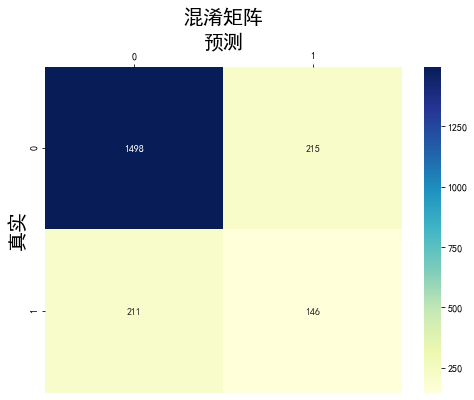

In [46]:
plt.figure(figsize = (8,6))
labels=[0,1]
C1 = confusion_matrix(y_test, y_pred_tree,labels = labels)
ax = sns.heatmap(C1,annot = True,cmap = 'YlGnBu',fmt='d',xticklabels = labels,yticklabels = labels)
ax.set_ylabel("真实", fontsize=20)
ax.set_xlabel("预测", fontsize=20)
ax.xaxis.set_label_position('top') 
ax.xaxis.tick_top()
ax.set_title('混淆矩阵',verticalalignment='bottom', fontsize=20)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

# 模型选择

## 决策树

In [47]:
#就是上面的

## 贝叶斯

In [48]:
from sklearn.naive_bayes import GaussianNB # 使用高斯朴素贝叶斯

In [49]:
clf = GaussianNB(var_smoothing = 1e-8)
clf.fit(x_train[['gender','int_corr','age','race','imprace','imprelig','field_cd','goal','date','go_out','career_c','attr', 'sinc', 'intel', 'fun', 'like', 'prob', 'met','age_o','race_o','like_o','prob_o', 'met_o','sports', 'tvsports', 'exercise', 'dining','museums', 'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv','theater', 'movies', 'concerts', 'music', 'shopping', 'yoga','attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o','shar_o']],y_train)
y_pred = clf.predict(x_test[['gender','int_corr','age','race','imprace','imprelig','field_cd','goal','date','go_out','career_c','attr', 'sinc', 'intel', 'fun', 'like', 'prob', 'met','age_o','race_o','like_o','prob_o', 'met_o','sports', 'tvsports', 'exercise', 'dining','museums', 'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv','theater', 'movies', 'concerts', 'music', 'shopping', 'yoga','attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o','shar_o']])
acc_score = accuracy_score(y_test,y_pred)
pre_score = metrics.precision_score(y_test,y_pred,average = 'weighted') 
F1_score = metrics.f1_score(y_pred, y_test, average = 'weighted') #F值
print('ACC',acc_score)
print('PRE',pre_score)
print('F',F1_score)

ACC 0.7801932367149759
PRE 0.8363338804963452
F 0.7613764214779681


(2.0, 0.0)

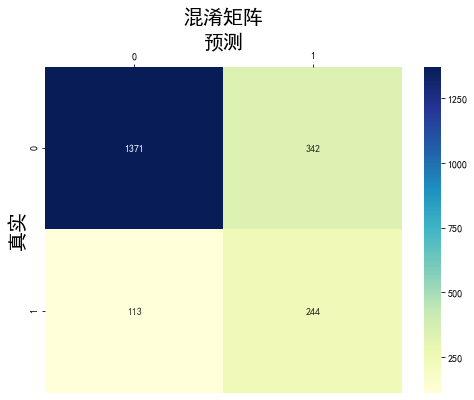

In [50]:
plt.figure(figsize = (8,6))
labels=[0,1]
C1 = confusion_matrix(y_test, y_pred,labels = labels)
ax = sns.heatmap(C1,annot = True,cmap = 'YlGnBu',fmt='d',xticklabels = labels,yticklabels = labels)
ax.set_ylabel("真实", fontsize=20)
ax.set_xlabel("预测", fontsize=20)
ax.xaxis.set_label_position('top') 
ax.xaxis.tick_top()
ax.set_title('混淆矩阵',verticalalignment='bottom', fontsize=20)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

## 神经网络

In [51]:
from sklearn.neural_network import MLPClassifier

In [52]:
mlp = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 5), random_state=1)
mlp.fit(x_train[['gender','int_corr','age','race','imprace','imprelig','field_cd','goal','date','go_out','career_c','attr', 'sinc', 'intel', 'fun', 'like', 'prob', 'met','age_o','race_o','like_o','prob_o', 'met_o','sports', 'tvsports', 'exercise', 'dining','museums', 'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv','theater', 'movies', 'concerts', 'music', 'shopping', 'yoga','attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o','shar_o']],y_train)
y_pred_mlp = mlp.predict(x_test[['gender','int_corr','age','race','imprace','imprelig','field_cd','goal','date','go_out','career_c','attr', 'sinc', 'intel', 'fun', 'like', 'prob', 'met','age_o','race_o','like_o','prob_o', 'met_o','sports', 'tvsports', 'exercise', 'dining','museums', 'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv','theater', 'movies', 'concerts', 'music', 'shopping', 'yoga','attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o','shar_o']])
acc_score = accuracy_score(y_test,y_pred_mlp)
pre_score = metrics.precision_score(y_test,y_pred_mlp, average = 'weighted') #精确率
F1_score = metrics.f1_score(y_pred_mlp, y_test, average = 'weighted') #F值
print('ACC',acc_score)
print('PRE',pre_score)
print('F',F1_score)

ACC 0.8429951690821256
PRE 0.8225432411446201
F 0.8592093941536446


(2.0, 0.0)

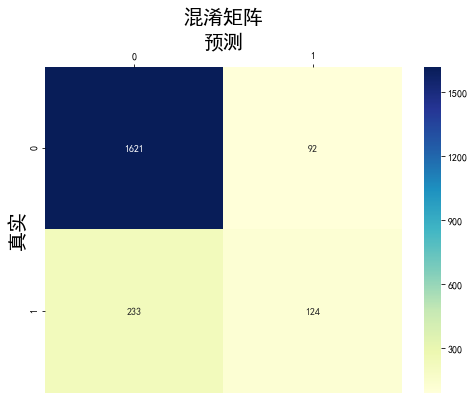

In [53]:
plt.figure(figsize = (8,6))
labels=[0,1]
C1 = confusion_matrix(y_test,y_pred_mlp,labels = labels)
ax = sns.heatmap(C1,annot = True,cmap = 'YlGnBu',fmt='d',xticklabels = labels,yticklabels = labels)
ax.set_ylabel("真实", fontsize=20)
ax.set_xlabel("预测", fontsize=20)
ax.xaxis.set_label_position('top') 
ax.xaxis.tick_top()
ax.set_title('混淆矩阵',verticalalignment='bottom', fontsize=20)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

## 随机森林

In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [55]:
rfc = RandomForestClassifier(random_state = 0)
rfc.fit(x_train[['gender','int_corr','age','race','imprace','imprelig','field_cd','goal','date','go_out','career_c','attr', 'sinc', 'intel', 'fun', 'like', 'prob', 'met','age_o','race_o','like_o','prob_o', 'met_o','sports', 'tvsports', 'exercise', 'dining','museums', 'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv','theater', 'movies', 'concerts', 'music', 'shopping', 'yoga','attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o','shar_o']],y_train)
y_pred_rfc = rfc.predict(x_test[['gender','int_corr','age','race','imprace','imprelig','field_cd','goal','date','go_out','career_c','attr', 'sinc', 'intel', 'fun', 'like', 'prob', 'met','age_o','race_o','like_o','prob_o', 'met_o','sports', 'tvsports', 'exercise', 'dining','museums', 'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv','theater', 'movies', 'concerts', 'music', 'shopping', 'yoga','attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o','shar_o']])
acc_score = accuracy_score(y_test,y_pred_rfc)
pre_score = metrics.precision_score(y_test,y_pred_rfc, average = 'weighted')
F1_score = metrics.f1_score(y_pred_rfc, y_test, average = 'weighted') #F值
print('ACC',acc_score)
print('PRE',pre_score)
print('F',F1_score)

ACC 0.8463768115942029
PRE 0.8230568667365774
F 0.8731682155297529


(2.0, 0.0)

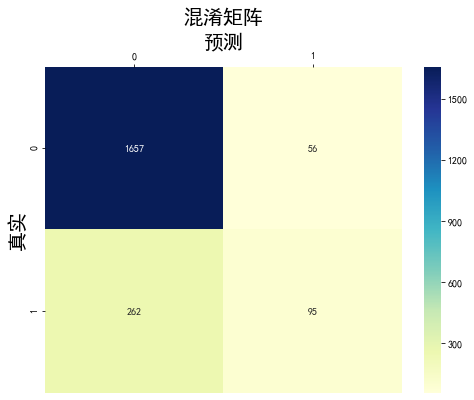

In [56]:
plt.figure(figsize = (8,6))
labels=[0,1]
C1 = confusion_matrix(y_test, y_pred_rfc,labels = labels)
ax = sns.heatmap(C1,annot = True,cmap = 'YlGnBu',fmt='d',xticklabels = labels,yticklabels = labels)
ax.set_ylabel("真实", fontsize=20)
ax.set_xlabel("预测", fontsize=20)
ax.xaxis.set_label_position('top') 
ax.xaxis.tick_top()
ax.set_title('混淆矩阵',verticalalignment='bottom', fontsize=20)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

## 极端随机树

In [57]:
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier

In [58]:
model = ExtraTreesClassifier()
model.fit(x_train[['gender','int_corr','age','race','imprace','imprelig','field_cd','goal','date','go_out','career_c','attr', 'sinc', 'intel', 'fun', 'like', 'prob', 'met','age_o','race_o','like_o','prob_o', 'met_o','sports', 'tvsports', 'exercise', 'dining','museums', 'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv','theater', 'movies', 'concerts', 'music', 'shopping', 'yoga','attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o','shar_o']],y_train)
#predict_train_lrc = model.predict(x_train[['gender','int_corr','age','race','imprace','imprelig','field_cd','goal','date','go_out','career_c','attr', 'sinc', 'intel', 'fun', 'like', 'prob', 'met','age_o','race_o','like_o','prob_o', 'met_o','sports', 'tvsports', 'exercise', 'dining','museums', 'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv','theater', 'movies', 'concerts', 'music', 'shopping', 'yoga','attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o','shar_o']])
predict_test_lrc = model.predict(x_test[['gender','int_corr','age','race','imprace','imprelig','field_cd','goal','date','go_out','career_c','attr', 'sinc', 'intel', 'fun', 'like', 'prob', 'met','age_o','race_o','like_o','prob_o', 'met_o','sports', 'tvsports', 'exercise', 'dining','museums', 'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv','theater', 'movies', 'concerts', 'music', 'shopping', 'yoga','attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o','shar_o']])
acc_score = accuracy_score(y_test,predict_test_lrc)
pre_score = metrics.precision_score(y_test,predict_test_lrc,average = 'weighted')
F1_score = metrics.f1_score(predict_test_lrc, y_test, average = 'weighted') #F值
print('ACC',acc_score)
print('PRE',pre_score)
print('F',F1_score)

ACC 0.851207729468599
PRE 0.8315891910362859
F 0.8798505414230494


(2.0, 0.0)

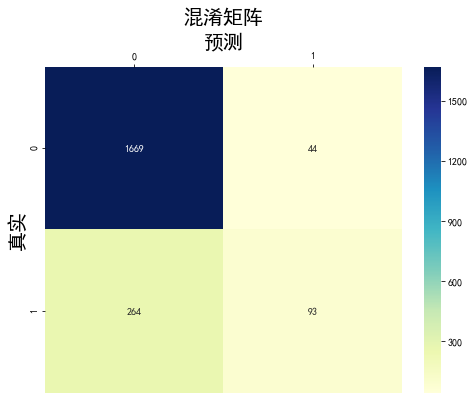

In [59]:
plt.figure(figsize = (8,6))
labels=[0,1]
C1 = confusion_matrix(y_test, predict_test_lrc,labels = labels)
ax = sns.heatmap(C1,annot = True,cmap = 'YlGnBu',fmt='d',xticklabels = labels,yticklabels = labels)
ax.set_ylabel("真实", fontsize=20)
ax.set_xlabel("预测", fontsize=20)
ax.xaxis.set_label_position('top') 
ax.xaxis.tick_top()
ax.set_title('混淆矩阵',verticalalignment='bottom', fontsize=20)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

## AdaBoost，梯度提升树

In [60]:
from sklearn import ensemble

In [61]:
adaBoost = ensemble.AdaBoostClassifier()
adaBoost.fit(x_train[['gender','int_corr','age','race','imprace','imprelig','field_cd','goal','date','go_out','career_c','attr', 'sinc', 'intel', 'fun', 'like', 'prob', 'met','age_o','race_o','like_o','prob_o', 'met_o','sports', 'tvsports', 'exercise', 'dining','museums', 'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv','theater', 'movies', 'concerts', 'music', 'shopping', 'yoga','attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o','shar_o']],y_train)
y_predict_GDBT = adaBoost.predict(x_test[['gender','int_corr','age','race','imprace','imprelig','field_cd','goal','date','go_out','career_c','attr', 'sinc', 'intel', 'fun', 'like', 'prob', 'met','age_o','race_o','like_o','prob_o', 'met_o','sports', 'tvsports', 'exercise', 'dining','museums', 'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv','theater', 'movies', 'concerts', 'music', 'shopping', 'yoga','attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o','shar_o']])
acc_score = accuracy_score(y_test,y_predict_GDBT)
pre_score = metrics.precision_score(y_test,y_predict_GDBT, average = 'weighted')
F1_score = metrics.f1_score(y_predict_GDBT, y_test, average = 'weighted') #F值
print('ACC',acc_score)
print('PRE',pre_score)
print('F',F1_score)

ACC 0.8526570048309179
PRE 0.8337559189607818
F 0.8707989747590494


(2.0, 0.0)

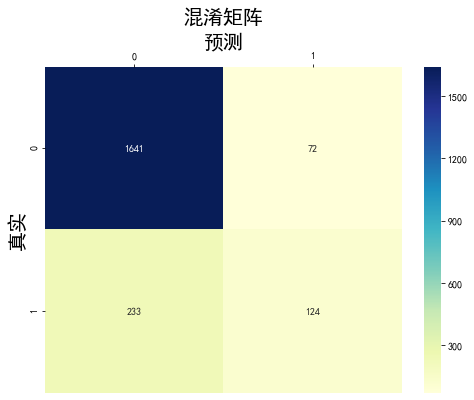

In [62]:
plt.figure(figsize = (8,6))
labels=[0,1]
C1 = confusion_matrix(y_test, y_predict_GDBT,labels = labels)
ax = sns.heatmap(C1,annot = True,cmap = 'YlGnBu',fmt='d',xticklabels = labels,yticklabels = labels)
ax.set_ylabel("真实", fontsize=20)
ax.set_xlabel("预测", fontsize=20)
ax.xaxis.set_label_position('top') 
ax.xaxis.tick_top()
ax.set_title('混淆矩阵',verticalalignment='bottom', fontsize=20)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

## 集成学习

In [63]:
data={
        'y_pred_RandomForest':y_pred_rfc,##随机森林
        'y_pred_ExtraTrees':predict_test_lrc,##极端随机树
        'y_pred_adaBoost':y_predict_GDBT##梯度提升树
        }

In [64]:
df_ensemble_learning=pd.DataFrame(data)

In [65]:
df_ensemble_learning

,y_pred_RandomForest,y_pred_ExtraTrees,y_pred_adaBoost
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
...,...,...,...
2065,0,0,0
2066,0,0,0
2067,0,0,0
2068,0,0,0


In [66]:
df_ensemble_learning['predict']=0
df_ensemble_learning.loc[(df_ensemble_learning['y_pred_RandomForest']+df_ensemble_learning['y_pred_ExtraTrees']+df_ensemble_learning['y_pred_adaBoost'])>=2,'predict']=1

In [67]:
df_ensemble_learning['truth']=y_test.tolist()

In [68]:
df_ensemble_learning

,y_pred_RandomForest,y_pred_ExtraTrees,y_pred_adaBoost,predict,truth
0,0,0,0,0,0
1,0,0,0,0,0
2,0,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,0
...,...,...,...,...,...
2065,0,0,0,0,0
2066,0,0,0,0,0
2067,0,0,0,0,0
2068,0,0,0,0,0


In [69]:
acc_score = accuracy_score(y_test,df_ensemble_learning['predict'])
pre_score = metrics.precision_score(y_test,df_ensemble_learning['predict'], average = 'weighted')
F1_score = metrics.f1_score(df_ensemble_learning['predict'], y_test, average = 'weighted') #F值
print('ACC',acc_score)
print('PRE',pre_score)
print('F',F1_score)

ACC 0.8560386473429952
PRE 0.8400240381129196
F 0.8837514978703529


(2.0, 0.0)

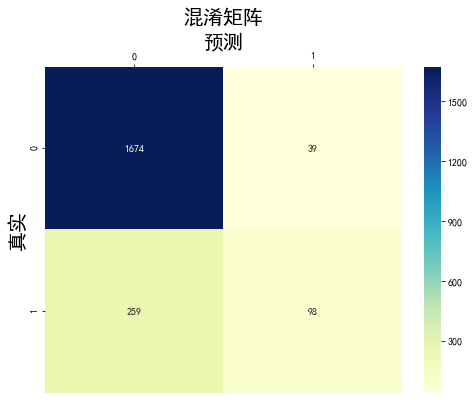

In [70]:
plt.figure(figsize = (8,6))
labels=[0,1]
C1 = confusion_matrix(y_test,df_ensemble_learning['predict'],labels = labels)
ax = sns.heatmap(C1,annot = True,cmap = 'YlGnBu',fmt='d',xticklabels = labels,yticklabels = labels)
ax.set_ylabel("真实", fontsize=20)
ax.set_xlabel("预测", fontsize=20)
ax.xaxis.set_label_position('top') 
ax.xaxis.tick_top()
ax.set_title('混淆矩阵',verticalalignment='bottom', fontsize=20)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

# 真正的测试集

In [71]:
test = pd.read_csv(r'D:\课程材料\深研院\机器学习\相亲\speed_dating_test.csv')
test.head()

,uid,iid,id,gender,idg,condtn,wave,round,position,positin1,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,0,393,15.0,0,29,2,15,19,3,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,187,4.0,1,8,1,8,10,4,1.0,...,8.0,9.0,12.0,8.0,8.0,NaN,NaN,NaN,NaN,NaN
2,2,474,9.0,0,17,2,19,15,8,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,383,5.0,0,9,2,15,19,8,8.0,...,7.0,8.0,5.0,6.0,4.0,7.0,8.0,6.0,7.0,5.0
4,4,360,20.0,0,38,2,14,18,1,1.0,...,7.0,9.0,8.0,7.0,8.0,8.0,9.0,7.0,7.0,8.0


# 预处理

In [72]:
test.duplicated().sum() #是否重复

0

In [73]:
df_test = test[['gender','int_corr',
 'age','race','imprace','imprelig','field_cd','goal','date','go_out','career_c',
 'sports', 'tvsports', 'exercise', 'dining',
 'museums', 'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv',
 'theater', 'movies', 'concerts', 'music', 'shopping', 'yoga',
 'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1',
 'attr3_1','sinc3_1','intel3_1','fun3_1','amb3_1',
 'attr', 'sinc', 'intel', 'fun', 'like', 'prob', 'met',
 'age_o','race_o',
 'attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o','shar_o',
 'like_o','prob_o', 'met_o']] #选取部分列 
#性别、参与者和合作伙伴在时间中的兴趣评级之间的相关性 basic
#年龄、种族、相同种族对钟意指数多重要、相同宗教信仰对钟意指数多重要、职业编码、参加活动的目的、平时约会频率、多久出去一次、打算从事的职
#兴趣爱好
#兴趣爱好
#兴趣爱好
#寻找什么
#自评
#basic
#对方年龄、对方种族、
#对方打分
#basic

## 缺失值

In [74]:
list_1 = ['gender','int_corr','age','race','imprace','imprelig','field_cd','goal','date','go_out','career_c','age_o','race_o']
for column in list_1: #第一部分缺失值
    mean_val = df_test[column].mean()
    df_test[column].fillna(mean_val, inplace = True)

for i in ['gender','age','race','imprace','imprelig','field_cd','goal','date','go_out','career_c','age_o','race_o']:
    df_test[i] = df_test[i].astype(int)

In [75]:
list_2 =[ 'sports', 'tvsports', 'exercise', 'dining','museums', 'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv','theater', 'yoga', 'movies', 'music', 'shopping', 'concerts']
for column in list_2:
    df_test[column][(df_test[column] > 10)] = 10
    df_test[column][(df_test[column] < 0)] = 0
    mean_val = df_test[column].mean()
    df_test[column].fillna(mean_val, inplace = True)
    df_test[column] = df_test[column].astype(int)

In [76]:
list_3 = ['attr3_1','sinc3_1','intel3_1','fun3_1','amb3_1','attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o','shar_o']
for column in list_3:
    df_test[column][(df_test[column] > 10)] = 10
    df_test[column][(df_test[column] < 0)] = 0
    mean_val = df_test[column].mean()
    df_test[column].fillna(mean_val, inplace = True)
    df_test[column] = df_test[column].astype(int)

In [77]:
list_4 = ['attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1']
for column in list_4:
    df_test[column][(df_test[column] > 100)] = 100
    df_test[column][(df_test[column] < 0)] = 0
    mean_val = df_test[column].mean()
    df_test[column].fillna(mean_val, inplace = True)
    df_test[column] = df_test[column].astype(int)

In [78]:
list_5 = ['attr', 'sinc', 'intel', 'fun', 'like', 'prob', 'met','like_o','prob_o', 'met_o']
for column in list_5:
    mean_val = df_test[column].mean()
    df_test[column].fillna(mean_val, inplace = True)
    df_test[column] = df_test[column].astype(int)

In [79]:
ind = df_test.isnull().T.any()
df_test[ind]

,gender,int_corr,age,race,imprace,imprelig,field_cd,goal,date,go_out,...,race_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o


# 模型预测

## 随机森林

In [80]:
rfc.fit(x_train[['gender','int_corr','age','race','imprace','imprelig','field_cd','goal','date','go_out','career_c','attr', 'sinc', 'intel', 'fun', 'like', 'prob', 'met','age_o','race_o','like_o','prob_o', 'met_o','sports', 'tvsports', 'exercise', 'dining','museums', 'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv','theater', 'movies', 'concerts', 'music', 'shopping', 'yoga','attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o','shar_o']],y_train)
y_pred_rfc = rfc.predict(df_test[['gender','int_corr','age','race','imprace','imprelig','field_cd','goal','date','go_out','career_c','attr', 'sinc', 'intel', 'fun', 'like', 'prob', 'met','age_o','race_o','like_o','prob_o', 'met_o','sports', 'tvsports', 'exercise', 'dining','museums', 'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv','theater', 'movies', 'concerts', 'music', 'shopping', 'yoga','attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o','shar_o']])

## 极端随机树

In [81]:
exc = ExtraTreesClassifier()
exc.fit(x_train[['gender','int_corr','age','race','imprace','imprelig','field_cd','goal','date','go_out','career_c','attr', 'sinc', 'intel', 'fun', 'like', 'prob', 'met','age_o','race_o','like_o','prob_o', 'met_o','sports', 'tvsports', 'exercise', 'dining','museums', 'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv','theater', 'movies', 'concerts', 'music', 'shopping', 'yoga','attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o','shar_o']],y_train)
y_pred_exc = exc.predict(df_test[['gender','int_corr','age','race','imprace','imprelig','field_cd','goal','date','go_out','career_c','attr', 'sinc', 'intel', 'fun', 'like', 'prob', 'met','age_o','race_o','like_o','prob_o', 'met_o','sports', 'tvsports', 'exercise', 'dining','museums', 'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv','theater', 'movies', 'concerts', 'music', 'shopping', 'yoga','attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o','shar_o']])

## AdaBoost，梯度提升树

In [82]:
adaBoost.fit(x_train[['gender','int_corr','age','race','imprace','imprelig','field_cd','goal','date','go_out','career_c','attr', 'sinc', 'intel', 'fun', 'like', 'prob', 'met','age_o','race_o','like_o','prob_o', 'met_o','sports', 'tvsports', 'exercise', 'dining','museums', 'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv','theater', 'movies', 'concerts', 'music', 'shopping', 'yoga','attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o','shar_o']],y_train)
y_pred_adb = adaBoost.predict(df_test[['gender','int_corr','age','race','imprace','imprelig','field_cd','goal','date','go_out','career_c','attr', 'sinc', 'intel', 'fun', 'like', 'prob', 'met','age_o','race_o','like_o','prob_o', 'met_o','sports', 'tvsports', 'exercise', 'dining','museums', 'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv','theater', 'movies', 'concerts', 'music', 'shopping', 'yoga','attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o','shar_o']])

# 投票法获得预测结果

In [83]:
df_test['y_pred_rfc']=y_pred_rfc
df_test['y_pred_exc']=y_pred_exc
df_test['y_pred_adb']=y_pred_adb

In [84]:
df_test['y_pred_final']=0
df_test.loc[(df_test['y_pred_rfc']+df_test['y_pred_exc']+df_test['y_pred_adb'])>=2,'y_pred_final']=1

In [85]:
df_test.head()

,gender,int_corr,age,race,imprace,imprelig,field_cd,goal,date,go_out,...,fun_o,amb_o,shar_o,like_o,prob_o,met_o,y_pred_rfc,y_pred_exc,y_pred_adb,y_pred_final
0,0,0.25,22,2,4,8,6,1,7,1,...,7,9,8,8,3,2,1,0,0,0
1,1,0.14,26,2,10,5,8,2,4,1,...,5,6,4,4,5,1,0,0,0,0
2,0,-0.06,30,1,1,1,10,1,6,5,...,9,8,6,8,5,2,1,0,0,0
3,0,0.24,27,2,10,5,9,3,6,2,...,7,7,5,6,8,1,0,0,0,0
4,0,0.27,24,6,8,4,3,2,6,2,...,5,6,5,6,5,2,0,0,0,0
